In [1]:
# view how polyfit make sense with FX data (oanda)

In [3]:
from OANDA_FUNC_CONF import *
from datetime import datetime, timezone, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random

In [4]:
# accountID = '101-011-15612193-001'
# access_token = '2897d1ae787989d30996a8a9d0a2c03d-7304ab578b56ccb454d311ecbc90cfdb'
# api = API(access_token=access_token, environment="practice")

In [5]:
dd = Data("H1", 5000)

In [6]:
bbWindow = 220
b = dd.bband(window=bbWindow)

In [7]:

testb = b[['raw', 'time', 'mean', 'upper', 'upper1', 'lower1',
	'lower', ]]
test = testb.iloc[:2000,:]

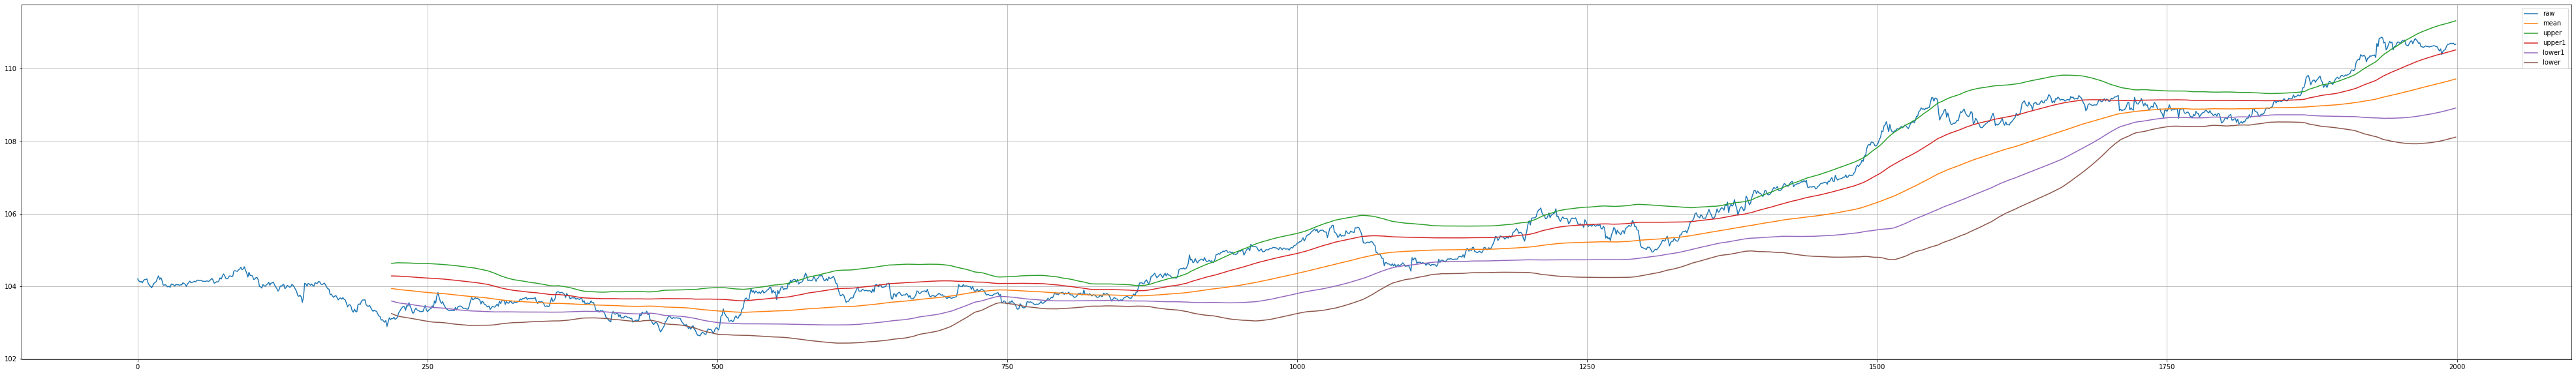

In [13]:
fig = test.plot(figsize=(70, 10), grid=True).get_figure()
fig.savefig("test.png")

In [155]:
def fitBB(bb, count):
	bb = bb[['raw', 'time', 'mean', 'upper', 'upper1', 'lower1',
       'lower', ]]

	bb = bb.iloc[:count,:]
	inAbove = False
	inBelow = False
	uCount = 0
	dCount = 0
	for i, row in bb.iterrows():
		if i < bbWindow:
			continue
		if row["raw"] > row["upper"]:
			if inAbove:
				continue
			else:
				inAbove = True
				uCount += 1
		elif row["raw"] < row["lower"]:
			if inBelow:
				continue
			else:
				inBelow = True
				dCount += 1
		else:
			inAbove = False
			inBelow = False
	return (uCount, dCount)
		
    
def fitBB1(bb, count):
	bb = bb[['raw', 'time', 'mean', 'upper', 'upper1', 'lower1',
       'lower', ]]

	bb = bb.iloc[:count,:]
	inAbove = False
	inBelow = False
	uCount = 0
	dCount = 0
	lastState = 0
	faultCount = 0 
	for i, row in bb.iterrows():
		if i < bbWindow:
			continue
		if row["raw"] > row["upper"]:
			if inAbove:
				continue
			else:
				inAbove = True
				uCount += 1
				if lastState == 1:
					faultCount += 1
		elif row["raw"] < row["lower"]:
			if inBelow:
				continue
			else:
				inBelow = True
				dCount += 1
				if lastState == -1:
					faultCount += 1
		else:
			if inAbove:
				lastState = 1
				inAbove = False
			elif inBelow:
				inBelow = False
				lastState = -1
			inAbove = False
			inBelow = False
	return round(faultCount / (uCount+dCount) ,3), (uCount, dCount)

In [156]:
fitBB1(b,3000)

(0.902, (29, 12))

In [149]:
def chooseOptPolicy1(dd, fitBBWindow=3000): # dd from Data class
	policies = [i for i in range(30,300, 10)]
	results = {}

	for p in policies:
		b = dd.bband(window=p)
		r = fitBB1(b, fitBBWindow) # count is length to estimate opt plicy
		results[p] = r
	print(results)
	opti = np.argmin([abs(v[1][0] - v[1][1]) for v in results.values()])
	opt = [v for i, v in enumerate(results.keys()) if i == opti][0]
	return opt

def chooseOptPolicy(dd, fitBBWindow=3000): # dd from Data class
	policies = [i for i in range(30,300, 10)]
	results = {}

	for p in policies:
		b = dd.bband(window=p)
		r = fitBB(b, fitBBWindow) # count is length to estimate opt plicy
		results[p] = r
	print(results)
	opti = np.argmin([abs(v[0] - v[1]) for v in results.values()])
	opt = [v for i, v in enumerate(results.keys()) if i == opti][0]
	return opt


In [157]:
# get opt policy
opts = chooseOptPolicy1(dd, fitBBWindow=3000)


{30: (0.714, (67, 59)), 40: (0.789, (62, 52)), 50: (0.796, (58, 50)), 60: (0.796, (50, 48)), 70: (0.768, (47, 35)), 80: (0.787, (41, 39)), 90: (0.793, (46, 36)), 100: (0.779, (41, 36)), 110: (0.764, (37, 35)), 120: (0.776, (43, 33)), 130: (0.776, (41, 35)), 140: (0.805, (43, 44)), 150: (0.849, (48, 38)), 160: (0.835, (47, 32)), 170: (0.811, (49, 25)), 180: (0.803, (42, 29)), 190: (0.781, (37, 27)), 200: (0.803, (40, 21)), 210: (0.867, (41, 19)), 220: (0.891, (40, 15)), 230: (0.875, (33, 15)), 240: (0.88, (34, 16)), 250: (0.92, (38, 12)), 260: (0.92, (37, 13)), 270: (0.92, (39, 11)), 280: (0.911, (35, 10)), 290: (0.902, (29, 12))}


In [2]:

test = dd.bband(window=140)

test = test[['raw', 'time', 'mean', 'upper', 'upper1', 'lower1',
       'lower', ]]
test.plot(figsize=(70, 10))


NameError: name 'dd' is not defined

In [168]:

class Trade:
    def __init__(self, arr):
        self.position = 0
        self.inPrice = 0
        self.timeAfterOrder = 0
        self.profit = 0
        self.arr = arr
        self.won = 0
        self.lost = 0
    def long(self,i,  ):
        if self.position == 0:
            self.inPrice = self.arr[i]
            self.position = 1
            self.timeAfterOrder = 0
            print(">>> LONG")
        elif self.position == 1:
            pass
        elif self.position == -1:
            self.close(i)
    def short(self, i, ):
        if self.position == 0:
            self.inPrice = self.arr[i]
            self.position = -1
            self.timeAfterOrder = 0
            print(">>> SHORT")
        elif self.position == 1:
            self.close(i)
        elif self.position == -1:
            pass  
    def close(self,i):
        if self.position > 0:
            profit = self.arr[i] - self.inPrice
        elif self.position < 0:
            profit = self.inPrice - self.arr[i]
        else:
            profit = None
        if profit != None:
            print("profit: ", profit)
        else:
            print("WARNING >>>>> DID NOT HAVE ANY POSITION BUT CLOSING...")
        self.profit += profit
        self.position = 0  
        self.timeAfterOrder = 0
        # update win ratio
        if profit > 0:
            self.won += 1
        elif profit < 0:
            self.lost += 1
        print("total profit: ", self.profit)


In [158]:
data = Data("M30", 5000)
# optW = 140
optW = chooseOptPolicy(data, fitBBWindow=3000)
print("optW :", optW)
optW = 200 # manual
bb = data.bband(window=optW,)

{30: (68, 67), 40: (51, 70), 50: (44, 46), 60: (39, 41), 70: (37, 40), 80: (33, 36), 90: (36, 38), 100: (35, 31), 110: (32, 26), 120: (37, 31), 130: (35, 27), 140: (33, 27), 150: (32, 28), 160: (32, 19), 170: (28, 19), 180: (33, 21), 190: (30, 18), 200: (26, 20), 210: (26, 19), 220: (23, 15), 230: (26, 13), 240: (23, 12), 250: (30, 12), 260: (27, 9), 270: (26, 9), 280: (23, 8), 290: (23, 4)}
optW : 30


<AxesSubplot:>

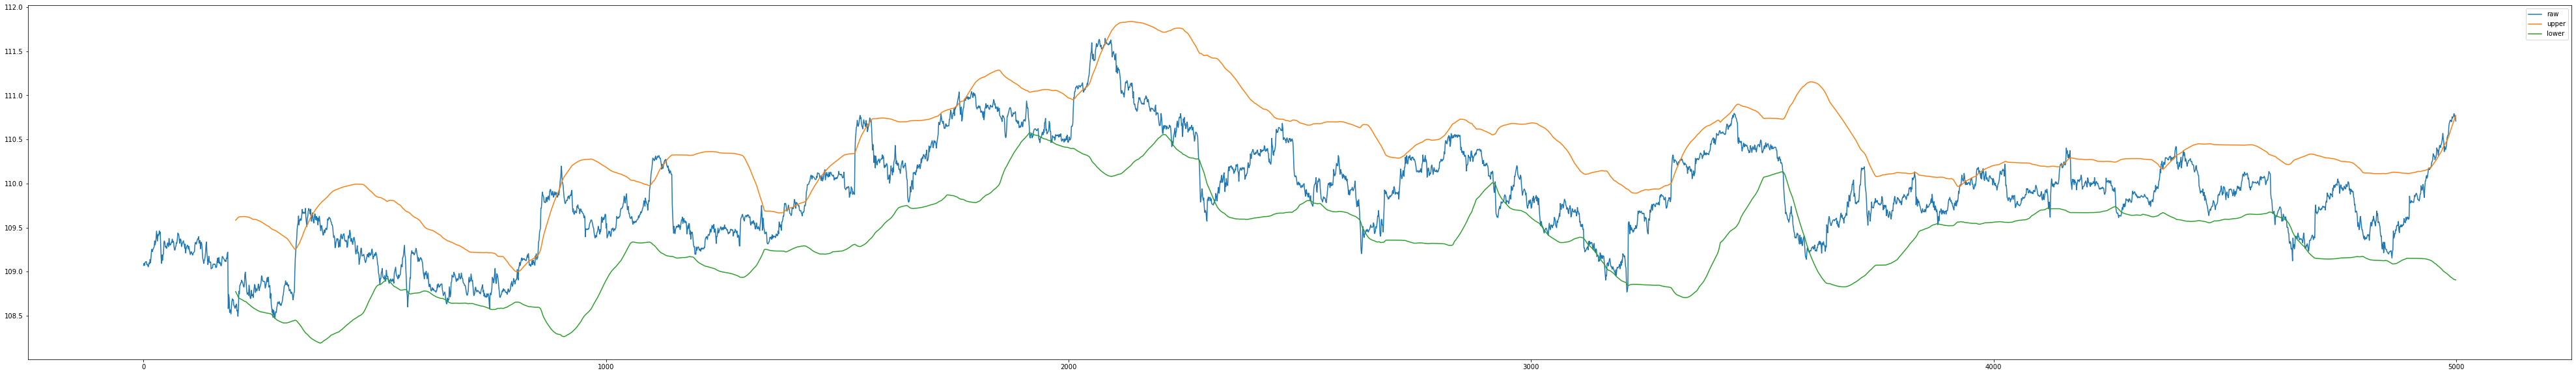

In [159]:
bb[["raw", "upper", "lower"]].plot(figsize=(70, 10))

In [160]:
row = bb.iloc[0]


In [ ]:
# hyper param
# SPAN ["M10", "M30", "M1", "M5"]
data = Data("M30", 5000)
# optW  
#optW = chooseOptPolicy(data, fitBBWindow=3000)
#NOT use chooseOptPolicy, do simulation instead
bb = data.bband(window=optW,)

In [187]:
# Policy Run
def bbSimulate(SPAN, LENGTH, optW): # SPAN is oanda granularity
	data = Data(SPAN, LENGTH)
	bb = data.bband(window=optW,)
	i = optW 
	t = Trade(bb["raw"].to_numpy() )
	inAbove = False
	inBelow = False
	# fromAbove = False
	# fromBelow = False

	while i < len(bb):
		row = bb.iloc[i]
		if row["raw"] > row["upper"]:
			if t.position == 1:
				t.short(i)
				print(row["time"])
			if inAbove:
				pass
			else:
				inAbove = True
		elif row["raw"] < row["lower"]:
			if t.position == -1:
				t.long(i)
				print(row["time"])
			if inBelow:
				pass
			else:
				inBelow = True
		else:
			if inAbove:
				t.short(i)
				inAbove = False
			elif inBelow:
				t.long(i)
				inBelow = False
			else:
				pass
		i += 1
		
	print("************\n*************END") 
	return t.profit, round(t.won / (t.won + t.lost),2)

In [ ]:
spans = [("M30",5000), ("H1",2500), ("H2",1250)]
bbWindows = [i for i in range(30,300, 10)]
result = []
for span in spans:
	for bbWindow in bbWindows:
		r = bbSimulate(span[0],span[1], bbWindow)
		result.append(((span, bbWindow), r))

In [192]:
[(o[0][0][0], o[0][1] ) for o in sorted(result, key=lambda x:x[1][0], reverse=True) if o[1][1] > 0.85]

[('M30', 280),
 ('H1', 170),
 ('M30', 240),
 ('M30', 230),
 ('M30', 160),
 ('M30', 140),
 ('H2', 70),
 ('M30', 290),
 ('H1', 70),
 ('M30', 250),
 ('H1', 140),
 ('H1', 80),
 ('M30', 170),
 ('M30', 150),
 ('M30', 270),
 ('M30', 220),
 ('M30', 180),
 ('H1', 100),
 ('M30', 200),
 ('M30', 210),
 ('H2', 40),
 ('H1', 150),
 ('H1', 130),
 ('H1', 120),
 ('H2', 80),
 ('H1', 190),
 ('H2', 100),
 ('M30', 260),
 ('H1', 160),
 ('H2', 50),
 ('H1', 200),
 ('H2', 90),
 ('H2', 290),
 ('H1', 90),
 ('M30', 190),
 ('H2', 60),
 ('H1', 180),
 ('H2', 270),
 ('H2', 280),
 ('H2', 260),
 ('H2', 250),
 ('H2', 240),
 ('H2', 230),
 ('H2', 220)]

In [1]:
# plot and check
data = Data("H1", 2500)
bb = data.bband(window=170)
bb[["raw", "upper", "lower"]].plot(figsize=(15,5))


NameError: name 'Data' is not defined

<AxesSubplot:>

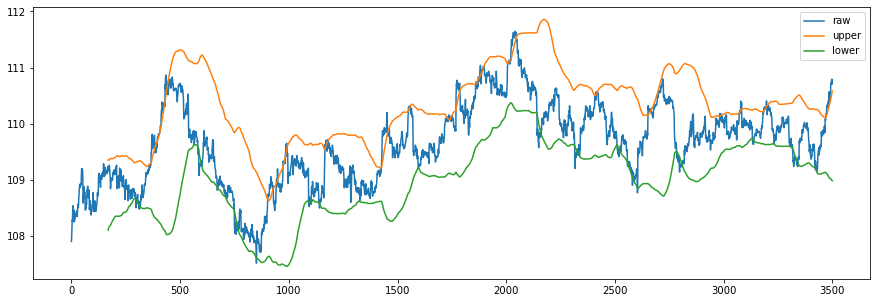

In [195]:

# plot and check
data = Data("H1", 3500)
bb = data.bband(window=170)
bb[["raw", "upper", "lower"]].plot(figsize=(15,5))

<AxesSubplot:>

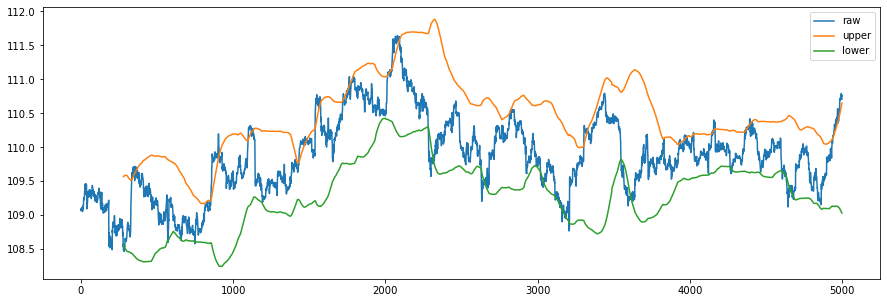

In [193]:

# plot and check
data = Data("M30", 5000)
bb = data.bband(window=280)
bb[["raw", "upper", "lower"]].plot(figsize=(15,5))